In [1]:
import numpy as np
from scipy import signal
from scipy import interpolate
from PIL import Image
import matplotlib.pyplot as plt
import numpy.linalg as npl
import os
from scipy.misc import imresize
from sklearn.neighbors import KNeighborsClassifier as Knc
from sklearn.cross_validation import train_test_split
from keras import models
from keras import layers
from keras.utils import to_categorical
import skimage.transform as skt
from sklearn.metrics.pairwise import cosine_similarity
from keras.applications.vgg16 import VGG16, preprocess_input

/usr/local/insa/anaconda/envs/GPU/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/insa/anaconda/envs/GPU/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def contenu_dossier(path_dossier):
    
    path=path_dossier

    liste_noms = os.listdir(path_dossier)
    liste_chemins=[]
    for name in liste_noms:
        if name[-4]!='.':
            liste_chemins2=contenu_dossier(path_dossier+'/'+name)
            liste_chemins+=liste_chemins2
        if name[-4:] == '.jpg':
            liste_chemins+=[path_dossier+"/"+name]
        else:
            pass
        
    return liste_chemins
    

In [3]:
model = VGG16(include_top=False, weights='imagenet')

In [10]:
def compute_features(chemins):
    n = len(chemins)
    features = np.zeros((n,25088))
    
    for i in range(n):
        image = np.expand_dims(preprocess_input(skt.resize(plt.imread(chemins[i]),(224,224,3), mode = 'reflect', preserve_range = True)),axis=0)
        features[i,:] = model.predict(image).ravel()
    return features

In [5]:
def trouve_voisins(data, indice, k, distance = "euclidean"):
    n = len(data)
    cible = np.zeros(n)
    data_knn = Knc(k, metric=distance)
    data_knn.fit(data, cible)
    return data_knn.kneighbors(data[indice].reshape(1, -1))

In [6]:
#fonction utile si on utilise la fonction knn
def affichage_voisins(data, indice, k, voisins):
    # Affichage en gros de l'image principale
    plt.figure()
    plt.imshow(plt.imread(data[indice]))
    plt.title("distance : " + str(voisins[0][0][0]))
    plt.show()
    
    # Affichage des autres au-dessous
    fig, axes = plt.subplots(1 , k - 1, figsize = (15,5))
    
    for ind, ax in enumerate(axes):
        ax.imshow(plt.imread(data[voisins[1][0][ind + 1]]))
        ax.set_title("distance : " + str(voisins[0][0][ind + 1]))
        
    fig.tight_layout()
    plt.show()

In [7]:
def cosine_voisins(data, indice, k):
    distance_totale = cosine_similarity(data, data)
    voisins = np.argsort(-distance_totale[indice])[:k+1]
    distance = distance_totale[indice, voisins]
    return distance, voisins

In [8]:
def affichage_cosine(indice, k, distance, voisins, chemins):
    # Affichage en gros de l'image principale
    plt.figure()
    plt.imshow(plt.imread(chemins[indice]))
    plt.title("similarité : " + str(distance[0]))
    plt.show()
    
    # Affichage des autres au-dessous
    fig, axes = plt.subplots(1 , k - 1, figsize = (15,5))
    
    for ind, ax in enumerate(axes):
        ax.imshow(plt.imread(chemins[voisins[ind + 1]]))
        ax.set_title("similarité : " + str(distance[ind + 1]))
        
    fig.tight_layout()
    plt.show()

In [11]:
#TEST
l_chemins = contenu_dossier("/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery")
features = compute_features(l_chemins)

In [12]:
indice = 950
k = 5
distance, voisins = cosine_voisins(features, indice, k)

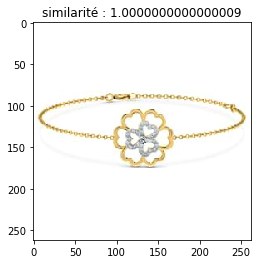

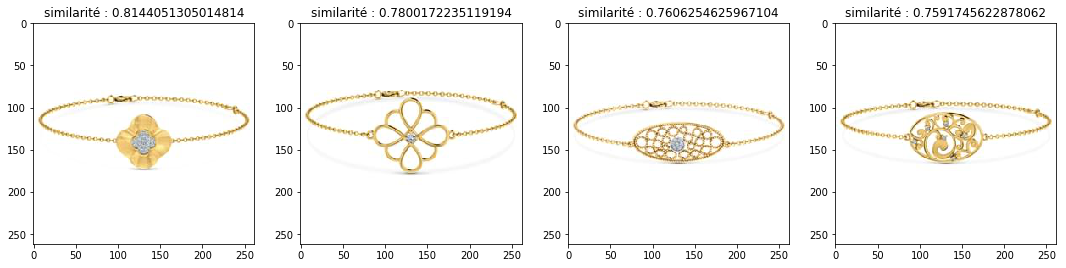

In [13]:
affichage_cosine(indice, k, distance, voisins, l_chemins)

In [14]:
voisins = trouve_voisins(features, indice, k)

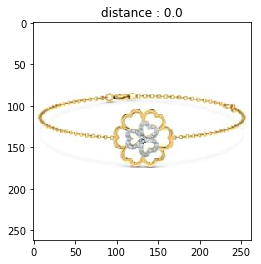

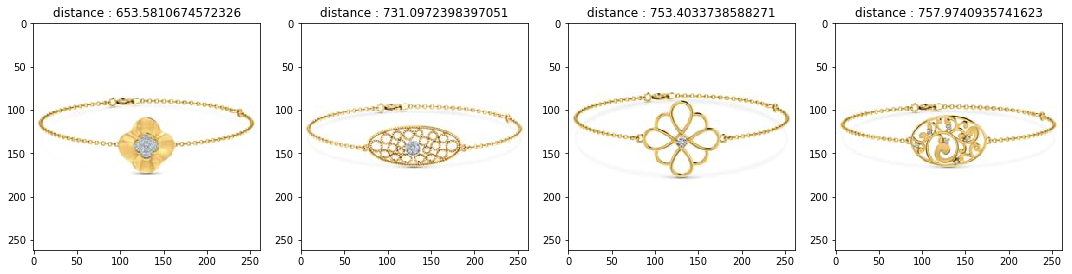

In [15]:
affichage_voisins(l_chemins, indice, k, voisins)